<a href="https://colab.research.google.com/github/Aliyamkamila/Data-Science-Intermediate/blob/main/Linear_Regresssion_End_to_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving lex.csv to lex.csv


In [11]:
import pandas as pd
data = pd.read_csv('lex.csv')
data.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.9,76.1,76.2,76.4,76.5,76.7,76.8,77.0,77.1,77.3
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,75.8,75.9,76.0,76.1,76.3,76.4,76.5,76.7,76.8,76.9
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,88.9,89.0,89.2,89.3,89.4,89.5,89.6,89.7,89.8,90.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.0,91.1,91.3,91.4,91.5,91.6,91.7,91.8,91.9,92.0
4,UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,83.7,83.8,83.9,84.0,84.1,84.2,84.3,84.5,84.6,84.7


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 462.6+ KB


In [13]:
data.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,31.503763,31.463441,31.480108,31.385484,31.460753,31.586559,31.644086,31.598387,31.385484,31.313441,...,82.605102,82.730102,82.856633,82.985204,83.113265,83.235204,83.363265,83.485204,83.609184,83.735204
std,3.809510,3.801217,3.932344,3.955872,3.928388,4.003874,4.102694,3.974506,4.080230,4.033412,...,10.628408,10.633405,10.644479,10.650323,10.655959,10.663618,10.667919,10.674303,10.681545,10.685698
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.025000,28.925000,28.900000,28.900000,28.925000,29.025000,29.025000,29.025000,28.925000,28.825000,...,78.775000,78.950000,79.075000,79.250000,79.450000,79.550000,79.725000,79.850000,80.025000,80.225000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.900000,85.000000,85.150000,85.300000,85.450000,85.600000,85.700000,85.800000,85.950000,86.050000
75%,33.875000,33.900000,33.875000,33.675000,33.775000,33.875000,33.975000,33.975000,33.775000,33.675000,...,88.525000,88.625000,88.725000,88.850000,89.025000,89.125000,89.225000,89.325000,89.425000,89.525000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.700000,93.800000,93.900000,94.100000,94.200000,94.300000,94.400000,94.500000,94.700000,94.800000


In [20]:
condition = data['country'] == 'USA'
data[condition]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
185,USA,39.4,39.4,39.4,39.4,39.4,39.4,39.4,39.4,39.4,...,88.4,88.5,88.6,88.7,88.8,89.0,89.1,89.2,89.3,89.4


In [24]:
us_life_expectancy = data.iloc[178][1:].values
us_life_expectancy

array([35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0,
       35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0,
       35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0,
       35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0,
       35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.1, 35.1, 35.1,
       35.2, 35.2, 35.2, 35.3, 35.3, 35.3, 35.4, 35.4, 35.5, 35.5, 35.5,
       35.5, 35.6, 35.6, 35.6, 35.7, 35.7, 35.8, 35.8, 35.8, 35.9, 35.9,
       35.9, 36.0, 36.0, 36.0, 36.1, 36.1, 36.1, 36.2, 36.2, 36.2, 36.3,
       36.3, 36.3, 36.4, 36.4, 36.4, 36.5, 36.5, 36.5, 36.6, 36.6, 36.6,
       36.7, 36.7, 36.8, 36.8, 36.8, 36.9, 36.9, 36.9, 37.0, 37.0, 37.0,
       37.1, 37.1, 37.1, 37.2, 28.7, 7.45, 20.2, 23.4, 20.3, 32.0, 31.0,
       31.0, 35.3, 37.5, 37.5, 37.6, 37.6, 37.6, 37.7, 37.7, 37.8, 37.8,
       37.9, 38.0, 38.1, 38.3, 38.4, 38.5, 37.6, 36.7, 35.9, 35.1, 34.3,
       35.9, 37.5, 39.1, 40.7, 42.3, 43.2, 44.1, 45

In [34]:
np.array(range(int(data.columns[1:].min()), int(data.columns[1:].max())))

array([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810,
       1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821,
       1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832,
       1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843,
       1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854,
       1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865,
       1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876,
       1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887,
       1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898,
       1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
       1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 19

In [28]:
data.columns[1:].min()

'1800'

In [29]:
data.columns[1:].max()

'2100'

In [26]:
import numpy as np

years = np.array(range(int(data.columns[1:].min()), int(data.columns[1:].max()) + 1))

print(years)

[1800 1801 1802 1803 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813
 1814 1815 1816 1817 1818 1819 1820 1821 1822 1823 1824 1825 1826 1827
 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841
 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855
 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869
 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883
 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897
 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911
 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939
 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 

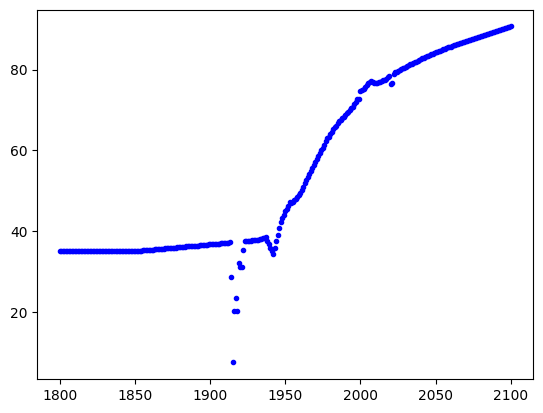

In [40]:
import matplotlib.pyplot as plt

plt.plot(years, us_life_expectancy, 'b.')
plt.show()

In [ ]:
# Training : Model latihan
# Testing : Ujian